In [1]:
# imports
# https://classroom.udacity.com/nanodegrees/nd880/parts/9a3a9589-7bc6-4694-81e0-8c3cb1aea251/modules/1976c245-f4ec-42bf-9611-180753a3a4df/lessons/eb063d38-d314-46bc-aeb5-12288aa5249c/concepts/11914781-4bb1-4c91-a0a3-b124159f9ff2
import pandas as pd
import numpy as np
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from zipline.pipeline.data import USEquityPricing
from quantopian.pipeline.filters import Q1500US

from quantopian.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar

from quantopian.pipeline.factors import Returns
from zipline.pipeline.factors import DailyReturns
from quantopian.pipeline.data import morningstar as mstar

trading_calendar = get_calendar('NYSE')

In [2]:
# Equities having a morningstar most recent market cap above $20B
have_market_cap = (mstar.valuation.market_cap.latest > 20000000000)

In [3]:
# create an empty pipeline with have_market_cap screen
pipeline = Pipeline(screen = have_market_cap)

In [4]:
# create daily returns factor
daily_ret = DailyReturns(inputs = [USEquityPricing.close])

### Add factors and filters to the pipeline
in the code below we add the daily_ret to the pipeline created above

In [5]:
# add the daily returns factor to the pipeline
pipeline.add(daily_ret, 'daily_return')

# set the starting and end dates
start_date = pd.Timestamp('2014-01-01', tz='utc')
end_date =pd.Timestamp('2019-07-26', tz = 'utc')

# Run our pipeline for the given start and end dates
output = run_pipeline(pipeline, start_date, end_date)

# display teh pipeline output
output.head()

daily_return
2014-01-02 00:00:00+00:00 Equity(24 [AAPL])       0.012011
                          Equity(62 [ABT])       -0.001562
                          Equity(64 [GOLD])       0.029206
                          Equity(114 [ADBE])      0.005542
                          Equity(128 [ADM])      -0.006409

In [6]:
returns_df = output.daily_return.unstack().fillna(0)
returns_df.head()

,Equity(2 [ARNC]),Equity(24 [AAPL]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(64 [GOLD]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),...,Equity(52592 [LIN]),Equity(52709 [TME]),Equity(52747 [DELL]),Equity(52968 [FOXA]),Equity(52969 [FOX]),Equity(52991 [DOW]),Equity(53023 [LYFT]),Equity(53095 [ZM]),Equity(53158 [UBER]),Equity(53196 [CTVA])
2014-01-02 00:00:00+00:00,0.0,0.012011,0.0,-0.001562,0.029206,0.0,0.0,0.005542,0.0,-0.006409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-03 00:00:00+00:00,0.0,-0.014131,0.0,-0.002608,0.039160,0.0,0.0,-0.009855,0.0,-0.009445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-06 00:00:00+00:00,0.0,-0.022034,0.0,0.010199,-0.009285,0.0,0.0,-0.002024,0.0,0.004186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-07 00:00:00+00:00,0.0,0.005377,0.0,0.013461,0.012128,0.0,0.0,-0.017918,0.0,0.002547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-01-08 00:00:00+00:00,0.0,-0.007205,0.0,-0.007663,-0.004357,0.0,0.0,0.014802,0.0,-0.010164,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Introduction
As we learned in the previous lessons, we can use PCA to crae a factor model of risk. Our risk factor model represents the return as:
$\textbf{r} = \textbf{Bf + s}$

where the $\textbf{r}$ is a matrix containing the asset returns, the $\textbf{B}$ is a matrix representing the factor exposures, $\textbf{f}$ is the matrix of factor returns, and $\textbf{s}$ is the idiosyncratic risk (also known as the company specific risk).

In this notebook, we will use real stock data to calculate:
* The factor exposures (Factor Betas) $\textbf{B}$
* The factor returns $\textbf{f}$
* The idiosyncratic risk matrix $\textbf{S}$
* The factor Covariance Matrix $\textbf{F}$

We will then combine these quantities to create our Risk Model.

### Factor Exposures / Factor Betas ( B )
In the code below, write a function `factor_betas(pca, factor_beta_indices, factor_beta_columns)` that calcualtes the factor exposures from Scikit-Learn's `PCA()` class. Remember the matrix of factor exposures, $\textbf{B}$, describes the coordinates of the Principal Components in the original basis. The `pca` parameter must be a Scikit-Learn's pca object, that  has fit the model with the returns. In other words, you must first run `pca.fit(returns)` before passing this parameter into the function.

Later in this notebook we will create a function, `fit_pca()` that will fit the pca model and return the `pca` object. 

The `factor_beta_indices` parameter must be a 1 dimensioanl ndarray containing the column names of the `returns` dataframe. 

The `factor_beta_columns` parameter must be a 1 dimensional ndarray containing evenly spaced integers from 0 up to the number of principal components you used in your `pca` model minus one. For example, if you used 5 principal components in you `pca` model, `pca = PCA(n_components = 5)` then `factor_beta_columns = [0,1,2,3,4]`. This function has to return a Pandas DataFrame with the factor exposures, where the `factor_beta_indices` correspond to the indices of the dataframe and the `factor_beta_columns` correspond to the column names of the dataframe.

In [20]:
def factor_betas(pca, factor_beta_indices, factor_beta_columns):

    #Implement Function
    
    assert len(factor_beta_indices.shape) == 1
    assert len(factor_beta_columns.shape) == 1
    
    return pd.DataFrame(pca.components_.T, factor_beta_indices, factor_beta_columns)

### Factor Returns
In the code below write a function `factor_returns(pca, returns_df, factor_return_indices, factor_return_columns)` that calculates the factor returns from Scikit-Learn's `PCA()` class. Remember the amtrix of factor returns $\textbf{f}$, represents the `returns_df` written in the **new** basis. Teh `pca` parameter must be a Scikit-Learn's pca object, that has fit the model with the reutrns. In other words, you must first run `pca.fit(returns)` before passign this parameter into the function. Later in this notebook we will create a function `fit_pca()`, that will fit the pca model and return the `pca` object. The `returns_df` parameter is the pandas dataframe of returns given at the benning of the notebook. The `factor_return_indices` parameter must be a 1 dimensional ndarray containing the trading dates (Pandas `DatetimeInde`) in the `returns` dataframe. The `factor_return_columns` parameter must be a 1 dimensional ndarray containing evenly spaced integers from 0 up to the number of principal components you used in your `pac` model minus one. or example, if you used 5 principal compoenents in your `pca` model, `pca = PCA(n_components = 5)`, then `factor_beta_columns = [0, 1, 2, 3, 4]`. This function has to return a Pandas dataframe with the factor returns, where the `factor_return_indices` correspond to the indices of the dataframe and the `factor_return_columns` correspond to the column names of the dataframe.

In [26]:
def factor_returns(pca, returns_df, factor_return_indices, factor_return_columns):
    
    assert len(factor_return_indices.shape) ==1
    assert len(factor_return_columns.shape) ==1
    
    return pd.DataFrame(pca.transform(returns_df), factor_return_indices, factor_return_columns)

### Idiosyncratic Risk Matrix
Let's review how we can calculate the Idiosyncrateic Risk Matrix $\textbf{S}$. We know that:
$$
\textbf{s} = \textbf{r} - \textbf{B}\textbf{f}
$$

we refer to $\textbf{s}$ as the residuals. To calculate the idiosyncratic or specific risk matrix $\textbf{S}$, we have to calculated the covariance matrix of residuals, $\textbf{s}$, and set the off-diagonal elements to zero.

With this in mind, in the code below create a function, `idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor)` that calculates the **annualized** Idiosyncratic Risk Matrix. The `returns` parameter is the pandas dataframe of returns given at the beginning of the notebook. The `factor_returns` parameter is the output of the `factor_returns()` function created above. Similarly, the `factor_betas` parameter is the output of the `factor_betas()` function created above. The `ann_factor` parameter is an integer representing the annualization factor.

Remember that if the `returns` time series are daily returns, then when we calculate the Idiosyncratic Risk Matrix we will get values on a daily bais. We can annualize these values simply by multiplying the whole Idiosyncratic Risk Matix by annualization factor of 252. Remember we dont need the square root of the factor because our numbers here are variances not standard deviations.

The functio must return a Pandas DataFrame with the annualized Idiosyncratic Risk Matrix containing the covariance of the residuals in its main diagonal and with all of the off-diagonal elements set to zero.

In [27]:
def idiosyncratic_var_matrix(returns_df, factor_returns, factor_betas, ann_factor):
    common_returns_ = pd.DataFrame(np.dot(factor_returns, factor_betas.T), returns_df.index, returns_df.columns)
    residuals_ = (returns_df - common_returns_)
    return pd.DataFrame(np.diag(np.var(residuals_))*ann_factor, returns_df.columns, returns_df.columns)

### Factor Covariance Matrix
To calculate the annualized factor covariance matrix, $\textbf{F}$, we use the following equation:

$$
\textbf{F} = \frac{1}{N-1}\textbf{f}\textbf{f}^T
$$

where, $N$ is the number of elements in $\textbf{f}$. Recall the factor covariance matrix, $\textbf{F}$, is a diagonal matrix.

With this in mind, crate a function `factor_cov_matrix(factor_returns, ann_factor)` that calculates the annualized factor covariance matrix from the factor returns $\textbf{f}$. The `factor_returns` parameter is teh output of the `factor_returns()` function crated above and the `ann_factor` parameter is an integer represent the annualization factor. The funciton must return a diagonal numpy ndarray.

**Note:** You can calculate the factor covariance matrix $\textbf{F}$ very easily uning Numpy's `.var` method. The $\frac{1}{N-1}$ factor can be taken into account using the `ddof` keyword.

In [28]:
def factor_cov_matrix(factor_returns, ann_factor):
    return np.diag(factor_returns.var(axis = 0, ddof = 1) * ann_factor)

### Perform PCA
In the code below, create a function, `fit_pca(returns, num_factor_exposures, svd_solver)` that uses Scikit-Learn's `PCA()` calss to fit the `returns` dataframe with the given number of `num_factor_exposures` (Principal Components) and with the given `svd_solver`. The `returns` parameter is the dataframe with the given at the beginning of the notebook. The `num_factor_exposures` parameter is an integer representing the number of Principal Components you wnat to use in your PCA algorithm. The `svd_solver` parameter is a string that determins the type of solver you want to use in your PCA algorithm. To see the type of solvers that you can use, see the [scikit-learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). The function must fit the `returns` and return the `pca` object.

In [34]:
from sklearn.decomposition import PCA

# def fit_pca(returns_df, num_factor_exposures, svd_solver):
def fit_pca(returns_df, num_factor_exposures):
    

    #TODO: Implement function
    
    pca = PCA(n_components=num_factor_exposures)
    # pca = PCA(n_components=num_factor_exposures, svd_solver=svd_solver)
    pca.fit(returns_df)
    
    return pca

### Create the Risk Model

In the code below, create the class:

```python
class RiskModel(object):
    def __init__(self, returns, ann_factor, num_factor_exposures, pca):
```

where the `returns` parameter is the pandas dataframe of returns given at the beginning of the notebook. The `ann_factor` parameter is an integer representing the annualization factor. The `num_factor_exposures` parameter is an integer representing the number of Principal Components you want to use in your PCA algorithm. The `pca` parameter is the output of the `fit_pca()` function created above.

The class **MUST** contain all the functions created above. For example, to include the Factor covariance matrix we will use:

```python
self.factor_cov_matrix_ = factor_cov_matrix(self.factor_returns_, ann_factor)
```

In [36]:
import numpy as np

class RiskModel(object):
    def __init__(self, returns_df, ann_factor, num_factor_exposures, pca):

        self.factor_betas_ = factor_betas(pca, returns_df.columns.values, np.arange(num_factor_exposures))
        self.factor_returns_ = factor_returns(pca, returns_df, returns_df.index, np.arange(num_factor_exposures))
        self.factor_cov_matrix_ = factor_cov_matrix(self.factor_returns_, ann_factor)
        self.idiosyncratic_var_matrix_ = idiosyncratic_var_matrix(returns_df, self.factor_returns_, self.factor_betas_, ann_factor)

# Set the annualized factor
ann_factor = 252

# Set the number of factor exposures (principal components) for the PCA algorithm
num_factor_exposures = 20

# Set the svd solver for the PCA algorithm
# svd_solver = 'full'

# Fit the PCA Model using the fit_pca() fucntion 
#pca = fit_pca(returns_df, num_factor_exposures, svd_solver)
pca = fit_pca(returns_df, num_factor_exposures)

# Create a RiskModel object
rm = RiskModel(returns_df, ann_factor, num_factor_exposures, pca)

### Print the factor Exposures

In [37]:
rm.factor_betas_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Equity(2 [ARNC]),3.149274e-06,0.000624,-0.001790,0.000445,-0.000414,0.002842,-0.000722,0.000822,-0.000971,-0.000292,0.000050,-0.000305,0.003388,-0.001157,0.000179,-0.001918,0.002709,-0.001158,0.002870,-0.001272
Equity(24 [AAPL]),-4.154459e-04,0.055781,0.042695,-0.061585,-0.009977,0.006394,-0.010918,-0.017474,-0.010335,0.024299,0.053128,-0.000626,-0.018189,-0.041172,0.041120,0.010538,0.000239,-0.019555,-0.004472,0.023033
Equity(53 [ABMD]),1.284449e-06,-0.000036,0.000074,-0.000061,0.000073,0.000603,0.000046,0.000019,0.000138,-0.000093,-0.000138,-0.000536,-0.000549,-0.000872,0.000562,-0.000449,0.000506,0.001248,0.000056,0.000811
Equity(62 [ABT]),-3.659748e-04,0.052603,0.043589,-0.010848,0.033126,0.017535,-0.013990,0.038814,-0.002774,-0.004383,-0.043263,-0.003192,-0.019986,-0.013168,0.057796,-0.026792,-0.004068,-0.024437,0.030501,0.005149
Equity(64 [GOLD]),6.838702e-05,-0.001313,-0.022724,-0.021337,0.018334,0.052418,-0.013410,-0.001049,0.007091,0.007583,-0.008950,-0.081929,0.021324,0.056966,0.004067,0.021868,0.010729,-0.020094,-0.024051,-0.025105
Equity(67 [ADSK]),-1.658686e-04,0.035017,0.050672,-0.124199,-0.069469,-0.001239,0.012597,-0.026367,0.015354,0.030893,-0.059864,0.029034,0.023280,0.011935,0.025416,0.007794,-0.002327,0.022103,0.040529,0.012924
Equity(76 [TAP]),-1.956423e-05,0.006601,-0.004409,-0.003185,0.020192,0.010166,0.002756,-0.021741,-0.005940,0.011148,-0.008372,0.010779,-0.003993,-0.001355,-0.006783,0.011379,-0.007562,0.002982,-0.011823,0.015945
Equity(114 [ADBE]),-8.584977e-04,0.065952,0.068483,-0.079160,0.001966,0.027400,-0.034628,-0.030083,-0.015752,0.003780,0.032771,0.068665,0.021518,0.066745,0.085983,-0.012716,-0.004900,0.008525,0.078015,0.049606
Equity(122 [ADI]),-1.426624e-04,0.029564,0.042266,-0.078712,-0.055379,-0.018100,0.031923,-0.026645,0.019802,0.000367,-0.023542,-0.030002,0.041661,-0.085051,-0.019748,0.057256,0.001849,-0.022115,-0.037452,0.003429
Equity(128 [ADM]),1.354013e-04,0.045877,-0.003352,0.024579,0.020032,0.032827,0.031751,-0.005655,0.009777,0.006197,-0.001351,0.011026,-0.001633,-0.014741,0.000814,0.024017,-0.022967,-0.016858,-0.049905,-0.040285


### Print the Factor Returns

In [39]:
rm.factor_returns_

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2014-01-02 00:00:00+00:00,0.007042,0.082718,-0.009596,0.015970,-0.020349,-0.003667,-0.015108,-0.003611,0.008715,-0.000327,0.022712,0.013285,0.025509,0.018060,-0.004869,-0.006240,0.006843,0.018920,0.008585,-0.011673
2014-01-03 00:00:00+00:00,0.020676,-0.206281,0.071995,-0.033616,-0.032600,-0.030210,-0.026807,0.041438,0.014507,0.011910,0.006468,0.012591,-0.067164,0.010735,0.004848,0.063655,0.004632,-0.008364,-0.047764,-0.033926
2014-01-06 00:00:00+00:00,0.013122,-0.012578,0.026538,0.037109,-0.003361,-0.015181,0.024490,-0.012610,-0.005847,-0.025768,-0.008609,0.032635,-0.018545,-0.011228,0.032201,0.006369,-0.006039,-0.015589,0.020841,-0.035850
2014-01-07 00:00:00+00:00,0.023549,-0.063238,-0.004721,0.013841,0.000734,-0.027033,0.010587,-0.022498,0.003773,0.011616,-0.021905,0.033428,-0.014522,0.008579,-0.021835,0.016025,-0.009383,-0.026126,-0.002913,0.018428
2014-01-08 00:00:00+00:00,0.012748,0.069266,0.040453,0.051677,0.028447,0.011954,-0.020787,0.010398,-0.016766,0.019429,-0.001898,0.013336,0.057686,-0.043808,-0.007123,0.013062,0.013057,0.003015,0.079574,-0.006971
2014-01-09 00:00:00+00:00,0.020457,0.009785,0.059165,0.029917,-0.013581,-0.060985,-0.042570,0.020425,-0.030217,-0.018351,-0.005515,0.003973,0.030566,-0.036555,-0.010849,0.017334,-0.019585,-0.001895,0.005440,-0.008125
2014-01-10 00:00:00+00:00,0.012688,-0.011229,0.043910,0.048294,0.027799,0.008537,0.024338,0.049374,-0.000208,0.018225,-0.022153,0.027256,-0.030043,-0.040943,0.004563,0.029461,-0.023583,-0.043155,0.045394,-0.035205
2014-01-13 00:00:00+00:00,0.016564,0.085858,-0.045376,0.004662,0.039550,0.018398,-0.026806,-0.030844,-0.023778,-0.005293,-0.006326,-0.026426,0.039758,-0.011294,0.000634,-0.013554,0.004736,0.023667,0.003992,-0.016480
2014-01-14 00:00:00+00:00,0.022326,-0.205036,-0.012852,-0.044893,-0.020855,-0.038587,0.012148,-0.050587,-0.014897,0.025714,-0.038809,-0.004533,-0.036870,-0.009211,0.012337,0.035721,-0.026443,-0.034336,0.008237,-0.007113
2014-01-15 00:00:00+00:00,0.002910,0.163810,0.040868,0.037622,0.004396,0.004551,-0.059964,0.044289,-0.027430,-0.027130,-0.000080,0.003858,0.077842,-0.023217,0.005744,-0.017267,0.031325,0.024428,-0.001180,-0.027658


### Print the Idiosyncratic Risk Matrix

In [40]:
rm.idiosyncratic_var_matrix_

,Equity(2 [ARNC]),Equity(24 [AAPL]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(64 [GOLD]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),...,Equity(52592 [LIN]),Equity(52709 [TME]),Equity(52747 [DELL]),Equity(52968 [FOXA]),Equity(52969 [FOX]),Equity(52991 [DOW]),Equity(53023 [LYFT]),Equity(53095 [ZM]),Equity(53158 [UBER]),Equity(53196 [CTVA])
Equity(2 [ARNC]),0.001041,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(24 [AAPL]),0.000000,0.033363,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(53 [ABMD]),0.000000,0.000000,0.000043,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(62 [ABT]),0.000000,0.000000,0.000000,0.017252,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(64 [GOLD]),0.000000,0.000000,0.000000,0.000000,0.04549,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(67 [ADSK]),0.000000,0.000000,0.000000,0.000000,0.00000,0.024862,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(76 [TAP]),0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.006977,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(114 [ADBE]),0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.025669,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(122 [ADI]),0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.016618,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Equity(128 [ADM]),0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.02897,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Print the Factor Covariance Matrix

In [42]:
rm.factor_cov_matrix_

array([[ 58.73094378,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   6.08461949,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   1.23195202,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  

### View the Percent of Variance Explained by Each Factor

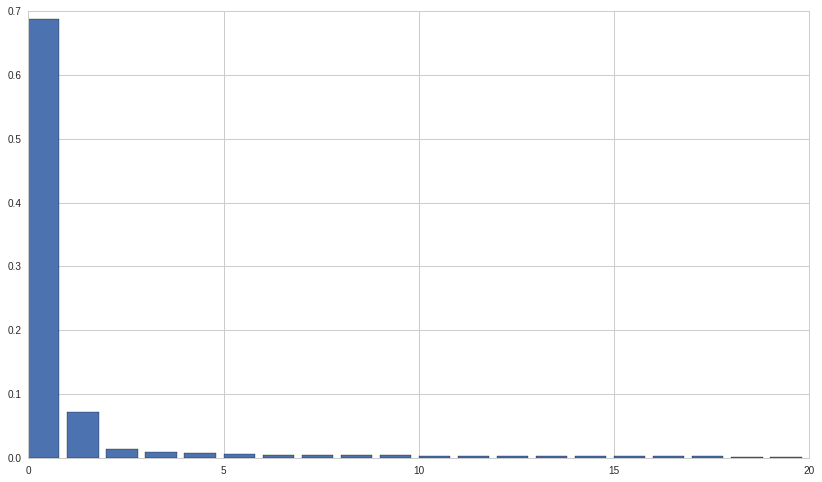

In [46]:
import matplotlib.pyplot as plt

#Make the bar plot
plt.bar(np.arange(num_factor_exposures), pca.explained_variance_ratio_);

You can see that the first factor dominates. The precision definition of each factor in a latent model is unknown; however, we can guess at the likely interpretation.

### View the Factor Returns
Remember that the factor returns dont necessarily have direct interpretations in the real world but you can think of them as returns time series for some kind of latent or unknown driver of return variance.

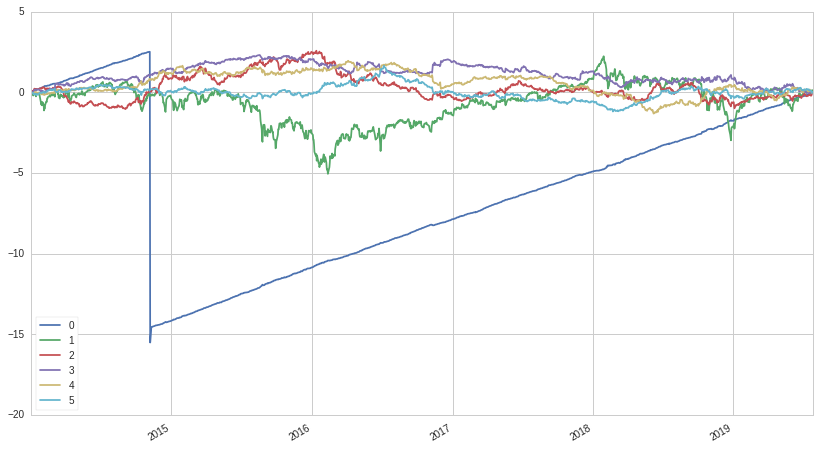

In [47]:
rm.factor_returns_.loc[:, 0:5].cumsum().plot();